In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from datetime import datetime

In [3]:
now =  datetime.now().strftime('%Y-%m-%d')
aapl = yf.download("AAPL", start= "2020-01-01", end= now)
aapl = aapl["Close"]
aapl

[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2020-01-02,75.087502
2020-01-03,74.357498
2020-01-06,74.949997
2020-01-07,74.597504
2020-01-08,75.797501
...,...
2024-12-24,258.200012
2024-12-26,259.019989
2024-12-27,255.589996


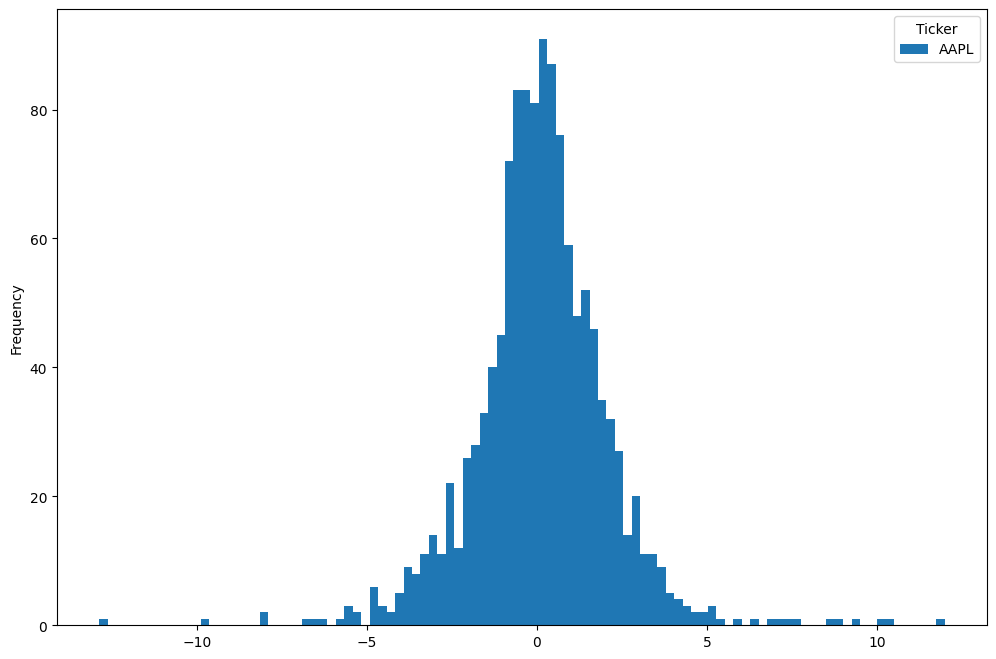

In [4]:
ret = aapl.pct_change().dropna()
ret = ret * 100
ret.plot(kind='hist',figsize=(12,8), bins=100)
plt.show()

In [5]:
daily_mean_ret = ret.mean()
var_daily=ret.var()
std_daily=np.sqrt(var_daily)
annual_mean_ret=daily_mean_ret*252
var_annual_ret=var_daily*252
annual_std_ret = np.sqrt(var_annual_ret)
print("Daily_mean is : " ,daily_mean_ret.values)
print("Var_daily is : " ,var_daily.values)
print("Std_daily is : " ,std_daily.values)
print("Annual_mean is : ",annual_mean_ret.values)
print("Var_annual_is:",var_annual_ret.values)
print("annual_std_return is : ",annual_std_ret.values)

Daily_mean is :  [0.11574574]
Var_daily is :  [3.98286266]
Std_daily is :  [1.99571107]
Annual_mean is :  [29.16792605]
Var_annual_is: [1003.68139039]
annual_std_return is :  [31.68093102]


[*********************100%***********************]  8 of 8 completed


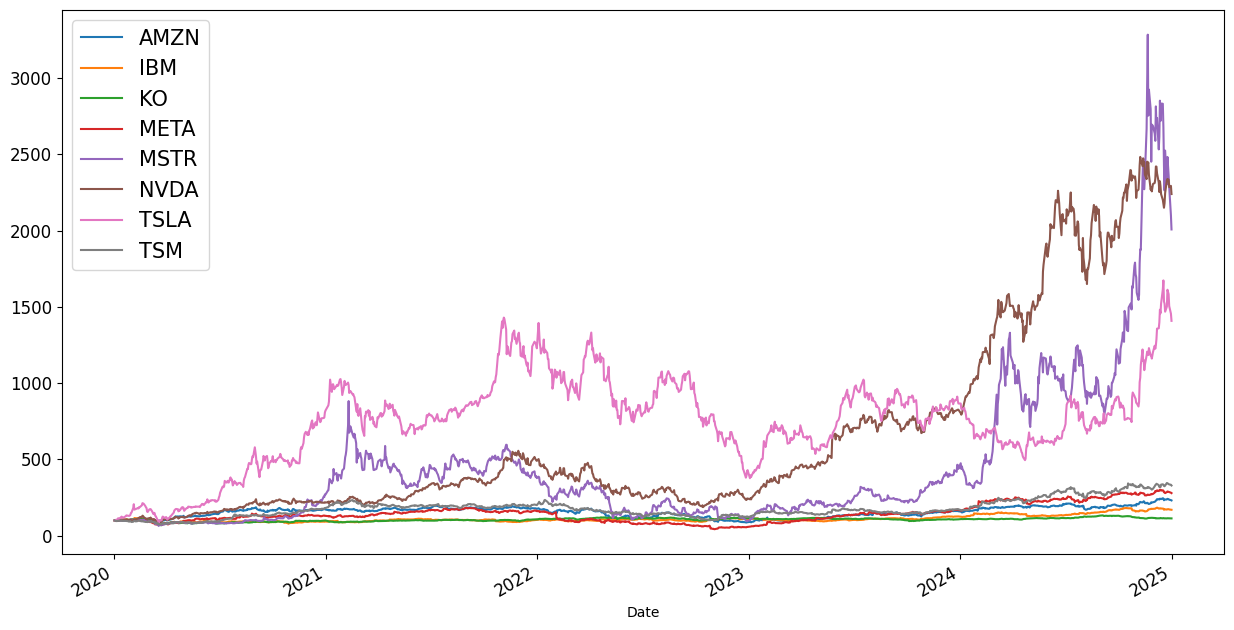

In [6]:
# Nvidia, Tesla, TSMC, Micro strategie, Meta(Faceboock), amazon
ticker = ["NVDA","TSLA","TSM","MSTR","META","AMZN","KO","IBM"]
now = datetime.now().strftime('%Y-%m-%d')
stocks = yf.download(ticker , start="2020-01-01", end = now)
stocks = stocks['Close']
stocks = stocks.div(stocks.iloc[0]).mul(100)
stocks.plot(figsize=(15,8), fontsize=12)
plt.legend(fontsize=15)
plt.show()

In [7]:
ret=stocks.pct_change().dropna()
summary = ret.describe().T.loc[:,["mean","std"]]
summary["mean"]=summary["mean"]*252
summary["std"]=summary["std"]*np.sqrt(252)
summary

,mean,std
Ticker,,
AMZN,0.232658,0.359639
IBM,0.142444,0.268619
KO,0.046685,0.208161
META,0.307912,0.448996
MSTR,1.026372,0.925111
NVDA,0.767724,0.538784
TSLA,0.755347,0.671815
TSM,0.312226,0.384399


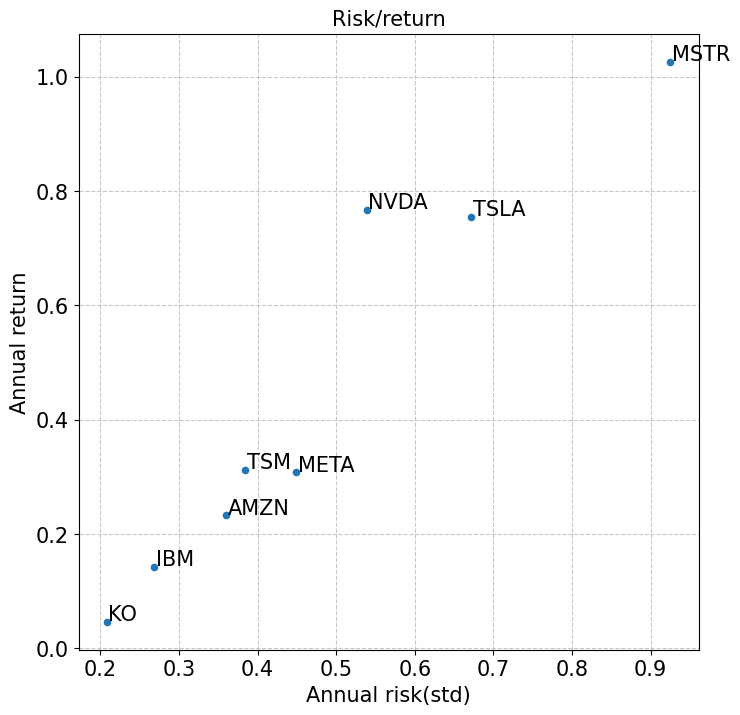

In [8]:
summary.plot.scatter(x="std",y="mean",figsize=(8,8),s=20,fontsize=15)
for i in summary.index:
    plt.annotate(i,xy=(summary.loc[i,"std"]+0.002,summary.loc[i,"mean"]+0.002),size=15)
plt.grid(True, linestyle='--', alpha = 0.7)
plt.xlabel("Annual risk(std)", fontsize = 15)
plt.ylabel("Annual return", fontsize = 15)
plt.title("Risk/return", fontsize = 15)
plt.show()
# Le graphique montre qu'une action présentant un risque plus élevé tend à rapporter davantage.

In [9]:
ret.cov()   

Ticker,AMZN,IBM,KO,META,MSTR,NVDA,TSLA,TSM
Ticker,,,,,,,,
AMZN,0.000513,0.000100,0.000065,0.000390,0.000476,0.000446,0.000415,0.000248
IBM,0.000100,0.000286,0.000121,0.000123,0.000152,0.000170,0.000117,0.000137
KO,0.000065,0.000121,0.000172,0.000082,0.000071,0.000095,0.000090,0.000064
META,0.000390,0.000123,0.000082,0.000800,0.000474,0.000514,0.000397,0.000298
MSTR,0.000476,0.000152,0.000071,0.000474,0.003396,0.000767,0.000878,0.000458
NVDA,0.000446,0.000170,0.000095,0.000514,0.000767,0.001152,0.000670,0.000545
TSLA,0.000415,0.000117,0.000090,0.000397,0.000878,0.000670,0.001791,0.000400
TSM,0.000248,0.000137,0.000064,0.000298,0.000458,0.000545,0.000400,0.000586


In [10]:
ret.corr()

Ticker,AMZN,IBM,KO,META,MSTR,NVDA,TSLA,TSM
Ticker,,,,,,,,
AMZN,1.000000,0.261247,0.218394,0.608977,0.360838,0.579749,0.432593,0.452943
IBM,0.261247,1.000000,0.544263,0.257744,0.154490,0.295162,0.163325,0.333506
KO,0.218394,0.544263,1.000000,0.221316,0.093447,0.213334,0.162674,0.202451
META,0.608977,0.257744,0.221316,1.000000,0.287854,0.535427,0.331374,0.435430
MSTR,0.360838,0.154490,0.093447,0.287854,1.000000,0.387736,0.355884,0.324696
NVDA,0.579749,0.295162,0.213334,0.535427,0.387736,1.000000,0.466213,0.662588
TSLA,0.432593,0.163325,0.162674,0.331374,0.355884,0.466213,1.000000,0.390483
TSM,0.452943,0.333506,0.202451,0.435430,0.324696,0.662588,0.390483,1.000000
